In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhivyaktiyadav","key":"3abff0459141716e6adb8a26e694a8b5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset

100% 4.94G/4.95G [01:10<00:00, 107MB/s] 
100% 4.95G/4.95G [01:10<00:00, 75.4MB/s]


In [ ]:
!unzip cbis-ddsm-breast-cancer-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [ ]:
import pandas as pd, numpy as np
import os, shutil
import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style
sns.set(style='dark')
import cv2
import PIL
import plotly.express as px
import random
from os import listdir
random.seed(100)
np.random.seed(100)

In [ ]:
!pip install colorama

## Dataset Description
#### Dataset has two parts csv and jpeg


In [ ]:
df = pd.read_csv(f'/content/csv/dicom_info.csv')
df['image_path'] = df.image_path.apply(lambda x: x.replace('CBIS-DDSM', dataset_dir))

In [ ]:
dicom_data = pd.read_csv('../content/csv/dicom_info.csv')

In [ ]:
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [ ]:
for info in zip(df.iloc[0].index, df.iloc[0]):
    print(f'{Fore.GREEN}{info[0]}{Style.RESET_ALL}:',info[1])

file_path: CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm
image_path: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
AccessionNumber: nan
BitsAllocated: 16
BitsStored: 16
BodyPartExamined: BREAST
Columns: 351
ContentDate: 20160426
ContentTime: 131732.685
ConversionType: WSD
HighBit: 15
InstanceNumber: 1
LargestImagePixelValue: 65535
Laterality: R
Modality: MG
PatientBirthDate: nan
PatientID: Mass-Training_P_01265_RIGHT_MLO_1
PatientName: Mass-Training_P_01265_RIGHT_MLO_1
PatientOrientation: MLO
PatientSex: nan
PhotometricInterpretation: MONOCHROME2
PixelRepresentation: 0
ReferringPhysicianName: nan
Rows: 289
SOPClassUID: 1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID: 1.3.6.1.4.1.9590.100.1.2.426380754911844882201419900442081103076
SamplesPerPixel: 1
SecondaryCaptureDeviceManufacturer: MathWorks
SecondaryCaptureDeviceManufacturerModelName: MATLAB
SeriesDescription:

In [ ]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object



## Images are stored in jpeg directory, there are two types of imgs:
#### 1. cropped images
#### 2. full mammograms
#### 3. ROI mask




In [ ]:
image_dir = '/content/jpeg'

## Cropped

In [ ]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     /content/jpeg/1.3.6.1.4.1.9590.100.1.2.1293087...
3     /content/jpeg/1.3.6.1.4.1.9590.100.1.2.3811873...
6     /content/jpeg/1.3.6.1.4.1.9590.100.1.2.1533390...
7     /content/jpeg/1.3.6.1.4.1.9590.100.1.2.1789947...
10    /content/jpeg/1.3.6.1.4.1.9590.100.1.2.4118334...
Name: image_path, dtype: object

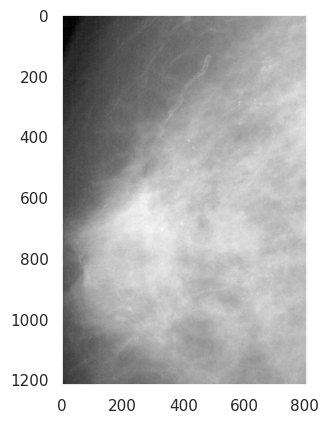

In [ ]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

## Full Mammogram

In [ ]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

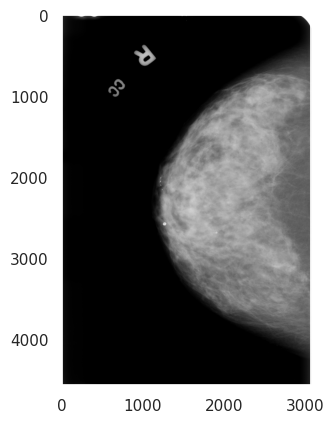

In [ ]:
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

## ROI mask

In [ ]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

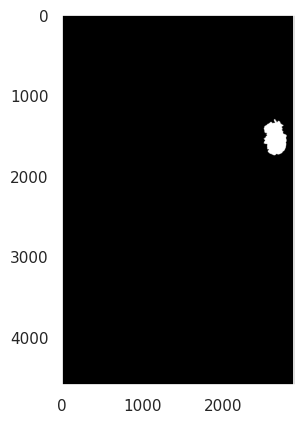

In [ ]:
for file  in ROI_mask_images[0:5]:
  ROI_mask_images_show = PIL.Image.open(file)
  gray_img= ROI_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

## Data-set Description

In [ ]:
data_1=pd.read_csv('/content/csv/calc_case_description_train_set.csv')

In [ ]:
data_1.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
data_1.describe()

breast density  abnormality id   assessment     subtlety
count     1546.000000     1546.000000  1546.000000  1546.000000
mean         2.663648        1.415265     3.258732     3.411384
std          0.937219        0.903571     1.229231     1.179754
min          1.000000        1.000000     0.000000     1.000000
25%          2.000000        1.000000     2.000000     3.000000
50%          3.000000        1.000000     4.000000     3.000000
75%          3.000000        1.000000     4.000000     4.000000
max          4.000000        7.000000     5.000000     5.000000

In [ ]:
data_2=pd.read_csv('/content/csv/mass_case_description_train_set.csv')
data_2.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

## Histopathology Dataset

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:36<00:00, 62.4MB/s]
100% 3.10G/3.10G [00:36<00:00, 91.3MB/s]


In [ ]:
!unzip breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

## Data Cleaning

In [ ]:
dicom_cleaning_data = dicom_data.copy()

In [ ]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)

In [ ]:
dicom_cleaning_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [ ]:
## removing null vals from SeriesDescription   and Laterality  as only this column had null vals
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1 = data_1.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [ ]:
#filling of any null values
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
#Renaming the columns to our needs
Data_cleaning_2 = data_2.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [ ]:
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [ ]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)

## Data Visualization

In [ ]:
breast_img = glob.glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [ ]:
for imgname in breast_img[:3]:
    print(imgname)

/content/IDC_regular_ps50_idx5/14191/1/14191_idx5_x2351_y1951_class1.png
/content/IDC_regular_ps50_idx5/14191/1/14191_idx5_x2151_y2101_class1.png
/content/IDC_regular_ps50_idx5/14191/1/14191_idx5_x2601_y2201_class1.png


In [ ]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)

    elif img[-5] == '1' :
        can_img.append(img)

In [ ]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer

total_img_num = non_can_num + can_num

print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [ ]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

#### from breast-histopathology-images Dataset , we coclude that from the above chart that : Cases with No cancer (0) is more than Cases with cancer(1)



In [ ]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

### finding varieties of images

In [ ]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

SeriesDescription  SeriesDescription_counts
0         cropped images                      3859
1        ROI mask images                      3340
2  full mammogram images                      3038

#### from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; cropped images , ROI images , Full mammogram images . from this graph we conclude that cropped images is the most used between them

In [ ]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

### Types of abnormalites of cancer

In [ ]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

abnormality  counts_of_abnormalties
0  calcification                    1546
1           mass                    1318

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_insight_2, *['counts_of_abnormalties'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_insight_2, *['counts_of_abnormalties'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(data_insight_2, *['abnormality'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(data_insight_2, *['counts_of_abnormalties', 'abnormality'], **{'inner': 'stick'})
chart

# Data Expl based on Calcification

In [ ]:
##They are two abnormalities of breast cancer ; Calcification abnormality and Mass abnormality . and Most cases are with calcification abnormalities
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

## Region of Calcification

In [ ]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHt','LEFT'] , 'Counts':[x,y]})
data_insight_3

left_or_right_breast  Counts
0                RIGHt     728
1                 LEFT     818

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_insight_3, *['Counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_insight_3, *['Counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(data_insight_3, *['left_or_right_breast'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(data_insight_3, *['Counts', 'left_or_right_breast'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data_insight_3, *['Counts', 'count()', 'left_or_right_breast'], **{})
chart

#### For Calcfication Cancer , most Cacification Cancer obtains in the Left Breast

In [ ]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' Clacification cancer position of breast ', title_x=0.5)
insight_3.show()

### types of calcification

In [ ]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

index  calc_type_counts
0                                         PLEOMORPHIC               664
1                                           AMORPHOUS               139
2                                            PUNCTATE               106
3                                       LUCENT_CENTER                93
4                                            VASCULAR                82
5                               FINE_LINEAR_BRANCHING                77
6                                              COARSE                35
7                     ROUND_AND_REGULAR-LUCENT_CENTER                33
8                   PLEOMORPHIC-FINE_LINEAR_BRANCHING                28
9            ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                24
10                         ROUND_AND_REGULAR-EGGSHELL                23
11                               PUNCTATE-PLEOMORPHIC                21
12                                         DYSTROPHIC                20
13                                    LUCENT_CENTERED                19
14         ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC                18
15                                  ROUND_AND_REGULAR                17
16                  ROUND_AND_REGULAR-LUCENT_CENTERED                14
17                              AMORPHOUS-PLEOMORPHIC                12
18                    LARGE_RODLIKE-ROUND_AND_REGULAR                11
19                                 PUNCTATE-AMORPHOUS                10
20             COARSE-ROUND_AND_REGULAR-LUCENT_CENTER                10
21                    VASCULAR-COARSE-LUCENT_CENTERED                 8
22                             LUCENT_CENTER-PUNCTATE                 8
23                      ROUND_AND_REGULAR-PLEOMORPHIC                 7
24                                           EGGSHELL                 7
25                     PUNCTATE-FINE_LINEAR_BRANCHING                 6
26                                    VASCULAR-COARSE                 6
27                         ROUND_AND_REGULAR-PUNCTATE                 5
28                    SKIN-PUNCTATE-ROUND_AND_REGULAR                 4
29                                      SKIN-PUNCTATE                 4
30           COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED                 4
31                         PUNCTATE-ROUND_AND_REGULAR                 4
32                                      LARGE_RODLIKE                 4
33                        AMORPHOUS-ROUND_AND_REGULAR                 3
34                             PUNCTATE-LUCENT_CENTER                 3
35                                               SKIN                 2
36  VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA...                 2
37                                 COARSE-PLEOMORPHIC                 2
38               ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS                 2
39                               COARSE-LUCENT_CENTER                 2
40                                    MILK_OF_CALCIUM                 2
41                           COARSE-ROUND_AND_REGULAR                 2
42                      SKIN-COARSE-ROUND_AND_REGULAR                 1
43                        ROUND_AND_REGULAR-AMORPHOUS                 1
44                            PLEOMORPHIC-PLEOMORPHIC                 1

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(z, *['calc_type_counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(z, *['calc_type_counts'], **{})
chart

#### Calcfication cancer has 45 types , Most of them obtain is PLEOMORPHIC

In [ ]:
bar_3 =px.bar(data_frame=z, y = 'index', x='calc_type_counts', color = 'index', orientation='h')
bar_3.update_layout(title_text='Types of calcification cancer', title_x=0.5,xaxis=dict(type='log'))
bar_3.show()

In [ ]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

index  calc_distribution_counts
0            CLUSTERED                      1000
1            SEGMENTAL                       214
2             REGIONAL                       118
3               LINEAR                       111
4     CLUSTERED-LINEAR                        49
5  DIFFUSELY_SCATTERED                        43
6  CLUSTERED-SEGMENTAL                         5
7     LINEAR-SEGMENTAL                         5
8    REGIONAL-REGIONAL                         1

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(g, *['calc_distribution_counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(g, *['calc_distribution_counts'], **{})
chart

In [ ]:
bar_4 =px.bar(data_frame=g, x = 'index', y='calc_distribution_counts', color = 'index', orientation='v')
bar_4.update_layout(title_text='Types of Distribution of calcification  cancer', title_x=0.5,yaxis=dict(type='log'))
bar_4.show()

for calcification cancer , there are 9 Types of Distribution of calcification cancer , Most of them obtained is Clustered

### pathology of breast cancer

In [ ]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a

pathology  counts
0                MALIGNANT     544
1                   BENIGN     528
2  BENIGN_WITHOUT_CALLBACK     474

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(a, *['counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(a, *['counts'], **{})
chart

In [ ]:
##  For calcification Cancer ,In Most Cases caner is Malignant
fig_2 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_2.update_layout(title_text='pathology of calcification  cancer', title_x=0.5)
fig_2.show()

# Data Expl Based on Mass of Breast

In [ ]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})

fig_5 =px.bar(data_frame=k, x = 'left_or_right_breast', y='counts', color = 'left_or_right_breast', orientation='v')
fig_5.update_layout(title_text='position of mass cancer', title_x=0.5)
fig_5.show()
## For Mass Cancer, Most cases ,Cancer is the Right Breast

In [ ]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})

## pathology of mass  cancer
fig_6 =px.bar(data_frame=p, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass  cancer', title_x=0.5)
fig_6.show()

In [ ]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})

### For Mass Cancer , There are 18 types of Mass_shape , Most off them found is IRREGULAR
fig_9 =px.bar(data_frame=s, y = 'index', x='mass_shape_counts', color = 'index', orientation='h')
fig_9.update_layout(title_text='Types of Mass_shape of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_9.show()

In [ ]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})

fig_10=px.bar(data_frame=u, y = 'mass_margins', x='counts', color = 'mass_margins', orientation='h')
fig_10.update_layout(title_text='Types of Mass_margins of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_10.show()
## for Mass Cancer , There are 15 type of Mass_margins , most of them found is CIRCUMSCRIBED


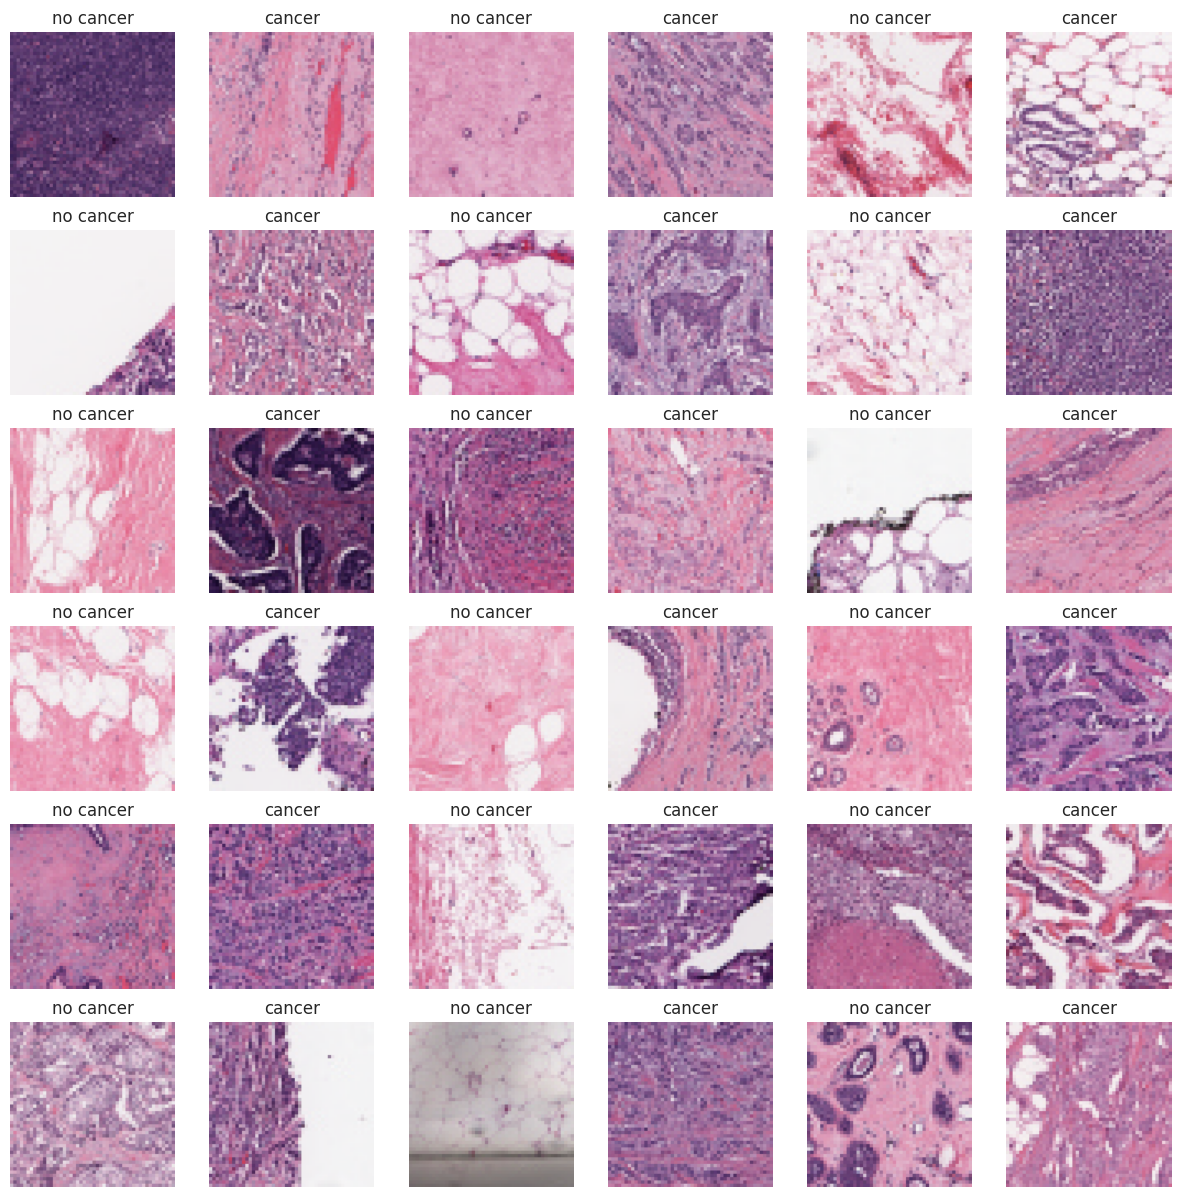

In [ ]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:

        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:

        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [ ]:
base_path = "/content/IDC_regular_ps50_idx5/"
folder = listdir(base_path)
len(folder)

279

In [ ]:
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)

total_images

277524

In [ ]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = base_path + patient_id
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = class_path + image_path
            data.iloc[k]["target"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1

data.head()

patient_id                                               path target
0      14191  /content/IDC_regular_ps50_idx5/14191/0/14191_i...      0
1      14191  /content/IDC_regular_ps50_idx5/14191/0/14191_i...      0
2      14191  /content/IDC_regular_ps50_idx5/14191/0/14191_i...      0
3      14191  /content/IDC_regular_ps50_idx5/14191/0/14191_i...      0
4      14191  /content/IDC_regular_ps50_idx5/14191/0/14191_i...      0

<ipython-input-112-3e1c0ab5fc01>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-112-3e1c0ab5fc01>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




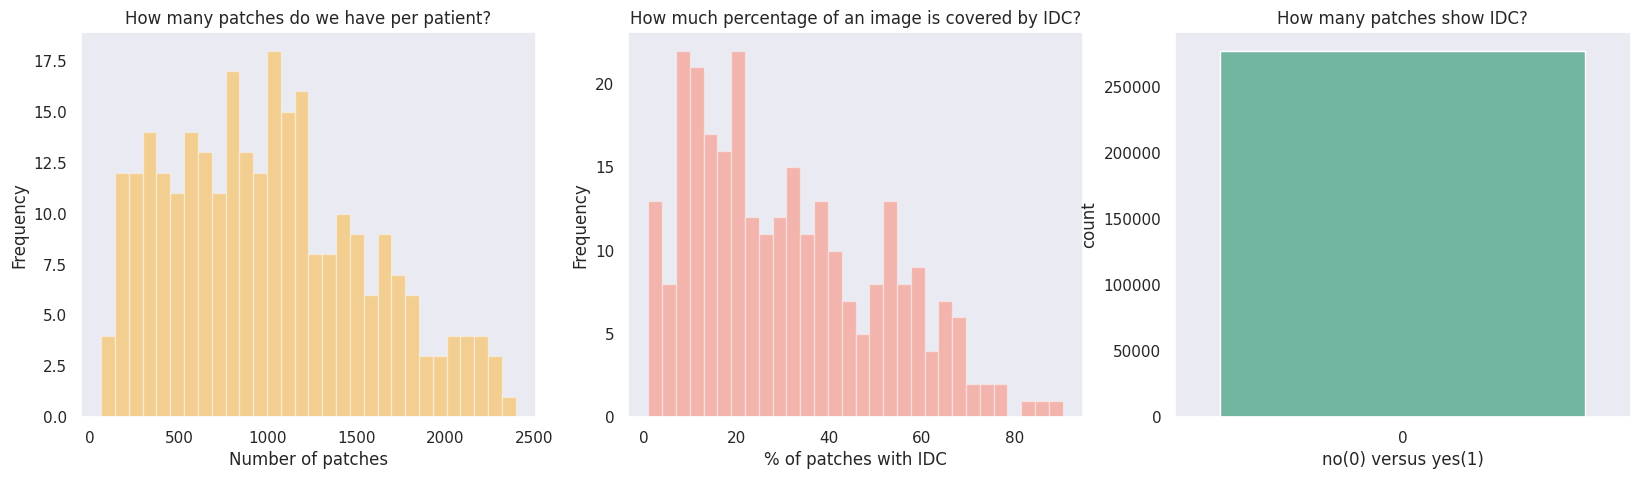

In [ ]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

Looking at healthy and cancer patches

In [ ]:
data.target = data.target.astype(np.int)
pos_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False)
neg_selection = np.random.choice(data[data.target==0].index.values, size=50, replace=False)

<ipython-input-113-a8ffab26e25e>:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Cancer patches

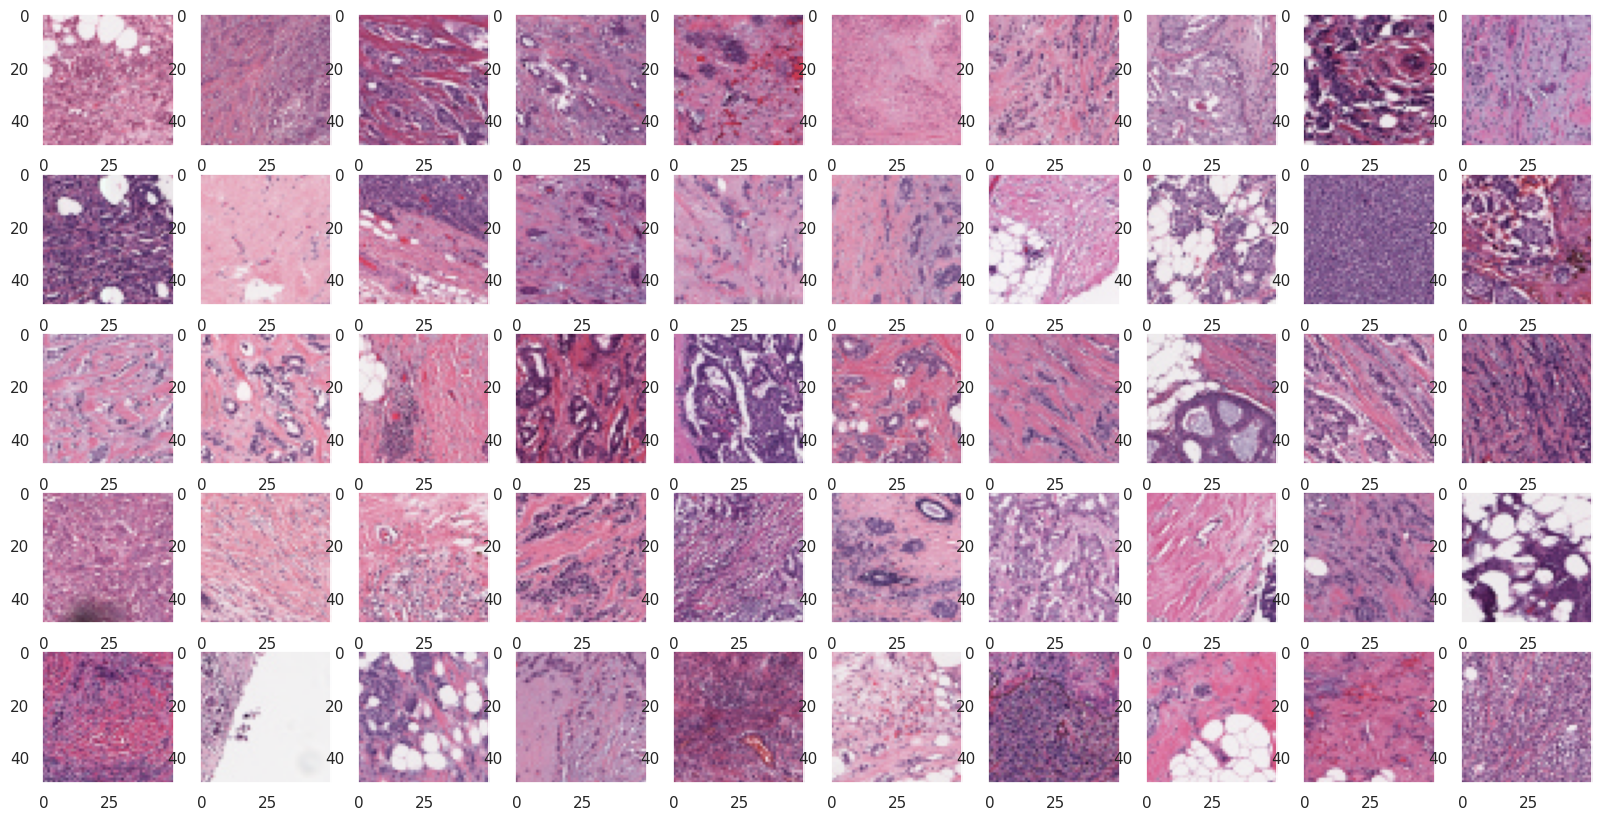

In [ ]:
from skimage.io import imread
o6
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

Healthy patches

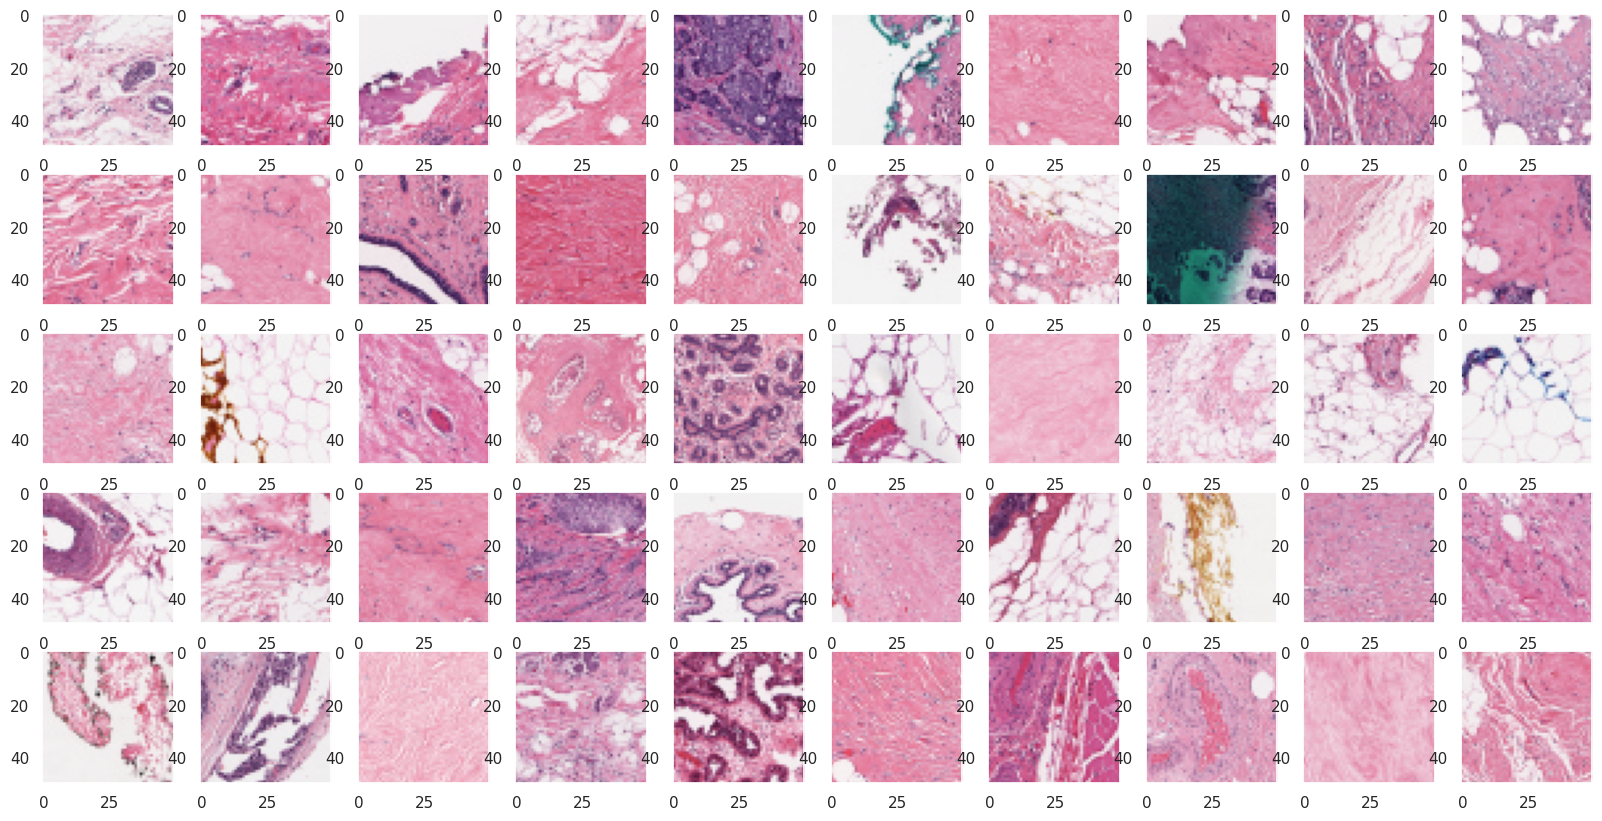

In [ ]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

# Visualising the breast tissue

In [ ]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = base_path + patient_id + "/" + cancer_id
    files = listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

##Visualising the breast tissue images
Ok, now it's time to go one step deeper with our EDA. Given the coordinates of image patches we could try to reconstruct the whole tissue image (not only the targets).

In [ ]:
def visualise_breast_tissue(patient_id, pred_df=None):
    example_df = get_patient_dataframe(patient_id)
    max_point = [example_df.y.max()-1, example_df.x.max()-1]
    grid = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    if pred_df is not None:
        patient_df = pred_df[pred_df.patient_id == patient_id].copy()
    mask_proba = np.zeros(shape = (max_point[0] + 50, max_point[1] + 50, 1)).astype(np.float)

    broken_patches = []
    for n in range(len(example_df)):
        try:
            image = imread(example_df.path.values[n])

            target = example_df.target.values[n]

            x_coord = np.int(example_df.x.values[n])
            y_coord = np.int(example_df.y.values[n])
            x_start = x_coord - 1
            y_start = y_coord - 1
            x_end = x_start + 50
            y_end = y_start + 50

            grid[y_start:y_end, x_start:x_end] = image
            if target == 1:
                mask[y_start:y_end, x_start:x_end, 0] = 250
                mask[y_start:y_end, x_start:x_end, 1] = 0
                mask[y_start:y_end, x_start:x_end, 2] = 0
            if pred_df is not None:

                proba = patient_df[
                    (patient_df.x==x_coord) & (patient_df.y==y_coord)].proba
                mask_proba[y_start:y_end, x_start:x_end, 0] = np.float(proba)

        except ValueError:
            broken_patches.append(example_df.path.values[n])


    return grid, mask, broken_patches, mask_proba

<ipython-input-119-5f2f52c79d49>:17: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-119-5f2f52c79d49>:21: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: http

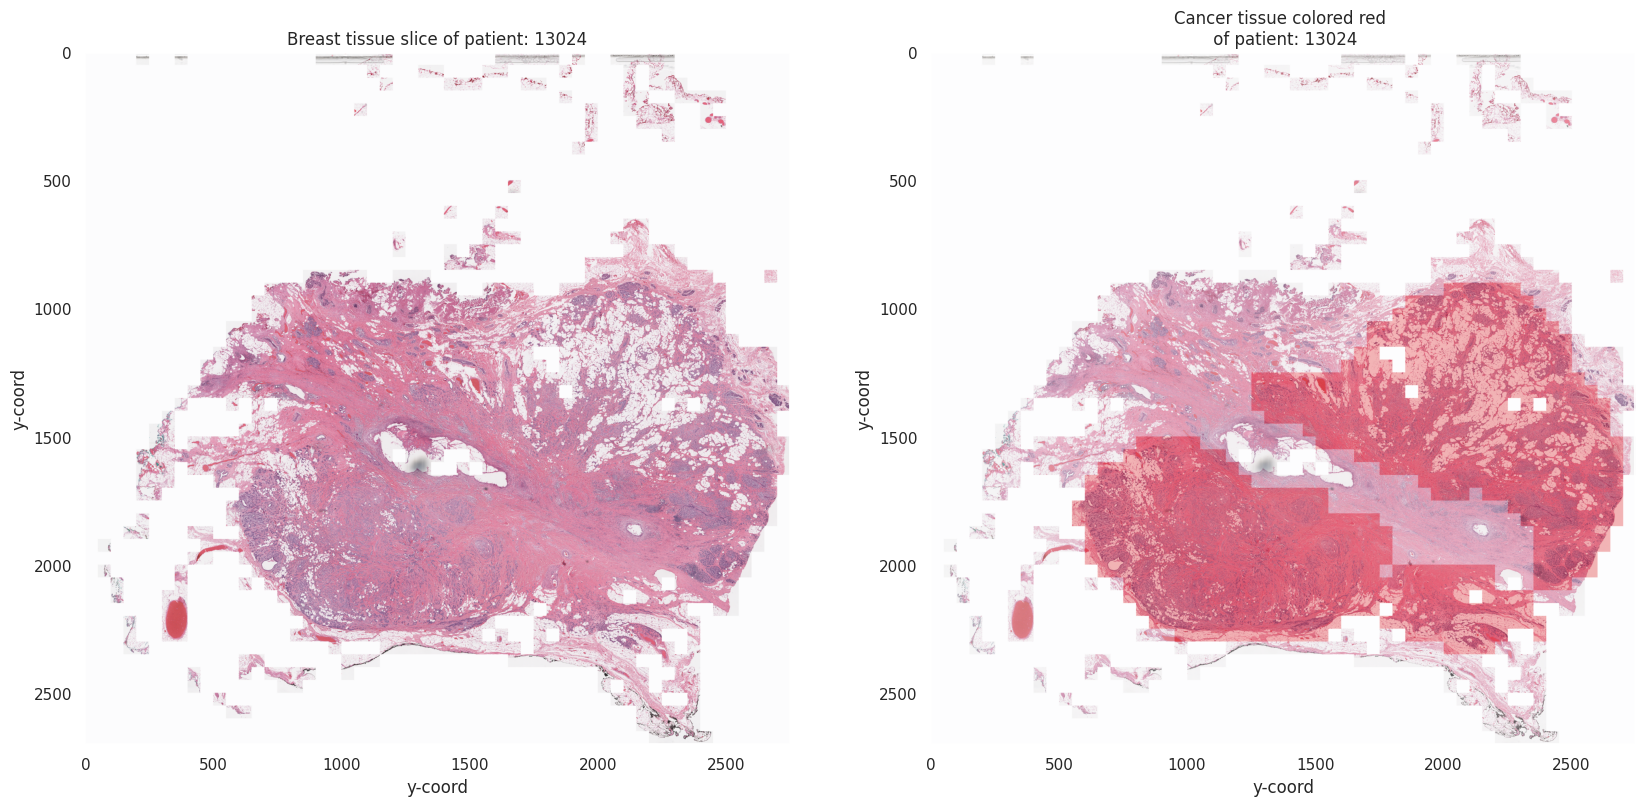

In [ ]:
example = "13616"
grid, mask, broken_patches,_ = visualise_breast_tissue(example)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(grid, alpha=0.9)
ax[1].imshow(mask, alpha=0.8)
ax[1].imshow(grid, alpha=0.7)
ax[0].grid(False)
ax[1].grid(False)
for m in range(2):
    ax[m].set_xlabel("y-coord")
    ax[m].set_ylabel("y-coord")
ax[0].set_title("Breast tissue slice of patient: " + patient_id)
ax[1].set_title("Cancer tissue colored red \n of patient: " + patient_id);

## Binary target visualisation per tissue slice
Before we will take a look at the whole tissue let's keep it a bit simpler by looking at the target structure in the x-y-space for a handful of patients:

In [ ]:
def get_patient_df(patient_id):
    return data.loc[data['patient_id']== patient_id,:]